- 데이터 탐색
 - 문제 정의
 - 변수 설명
 - 시각화
 - 이상치 및 결측치 확인
 - 유니크 갯수
- 데이터 전처리
 - 이상치 및 결측치 처리
 - 정규화
- 변수 생성
- 모델링
- GBM


In [1]:
# 패키지 임포트
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import gc

In [2]:
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')

In [3]:
print(df_train.shape)
print(df_test.shape)

(15035, 21)
(6468, 20)


In [4]:
df_train.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
5,5,20150403T000000,662500.0,3,2.50,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
6,6,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
7,7,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
8,8,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
9,9,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,...,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

In [6]:
# 요약
df_train['price'].describe()

count    1.503500e+04
mean     5.406827e+05
std      3.715247e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

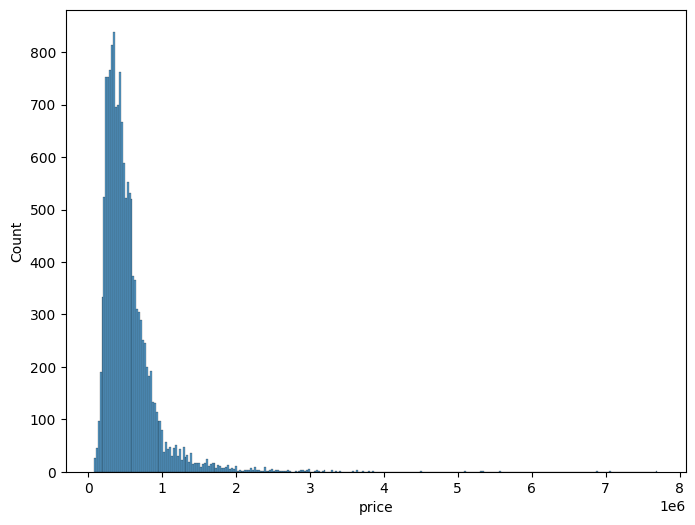

In [7]:
# 가격 히스토그램
plt.figure(figsize=(8,6))
sns.histplot(df_train['price'])

In [8]:
print('Skewness:', df_train['price'].skew())
print('Kurtosis:', df_train['price'].kurt())

Skewness: 4.290252396939529
Kurtosis: 40.15491919350329


- 왜도(skewness) : 데이터 분포가 얼마나 치우쳤는지 보여주는 척도로서, 왼쪽으로 꼬리가 길수록 음수 방향으로 값이 커지고, 오른쪽으로 꼬리가 길수록 양수 방향으로 값이 커진다.
- 첨도(kurtosis) : 데이터 분포가 분포 가운데에 얼마나 몰려있는지 보여주는 척도로서, 첨도 값(K)이 3에 가까울 경우 그래프는 정규분포에 가깝고, (K<3)이면 정규분포보다 더 평탄하다고 판단할 수 있으며, (K>3)인 경우 정규분포보다 더 뾰족한 분포로 간주 할 수 있다.

((array([-3.91024552, -3.69050911, -3.57011438, ...,  3.57011438,
          3.69050911,  3.91024552]),
  array([11.26447693, 11.28979441, 11.30221678, ..., 15.74485584,
         15.7703098 , 15.85673102])),
 (0.5246386762816584, 13.04812230186611, 0.9944175231748045))

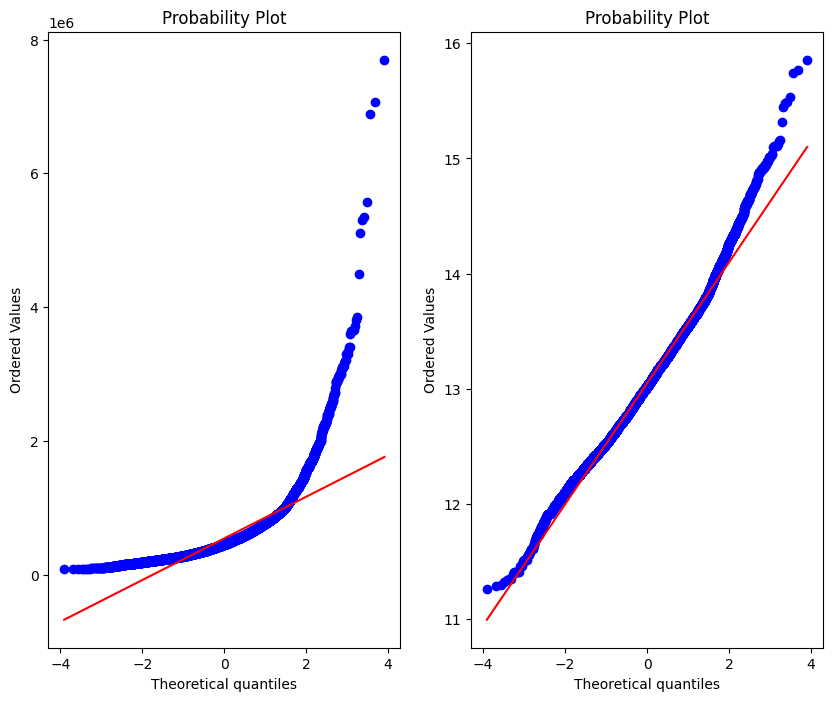

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10,8)
stats.probplot(x=df_train['price'], plot=axes[0])
stats.probplot(x=np.log1p(df_train['price']), plot=axes[1])

In [10]:
df_train['price'] = np.log1p(df_train['price'])

# 가격에 관한 상관관계
k = 15 # 히트맵에 표시할 변수 갯수
corrmat = abs(df_train.corr(method='spearman')) # correlation 전체 변수에 대해서 계산
cols = corrmat.nlargest(k, 'price').index # nlargest : return this many descending sorted values
cm = np.corrcoef(df_train[cols].values.T) # correlation 특정 칼럼에 대해서

fig, ax = plt.subplots(figsize=(18,8))
sns.heatmap(data=cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':8}, yticklabels=cols.values, xticklabels=cols.values, ax=ax)

<Axes: xlabel='grade', ylabel='price'>

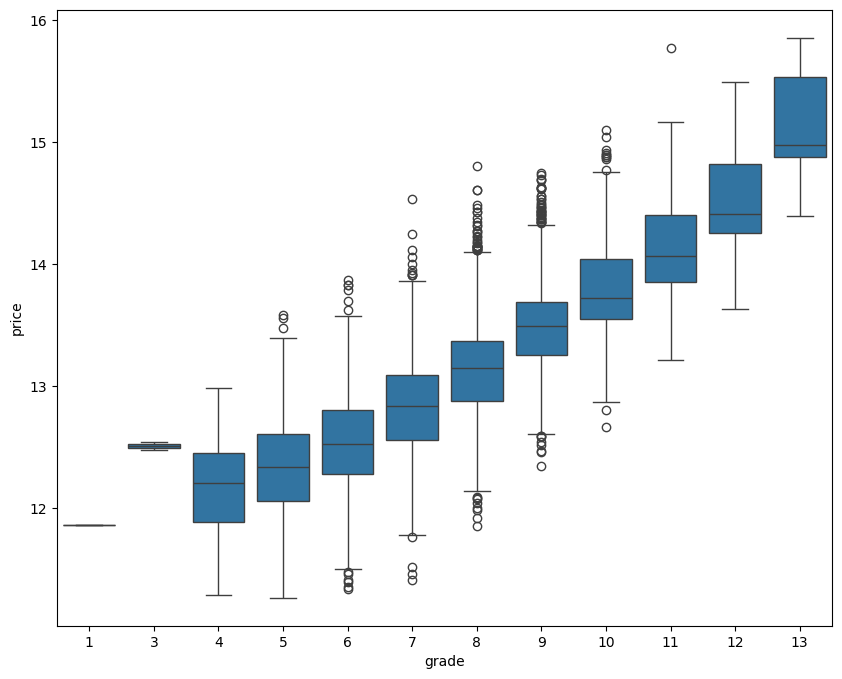

In [11]:
data = pd.concat([df_train['price'], df_train['grade']], axis=1)
f, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=data, x='grade', y='price', ax=ax)

<Axes: xlabel='sqft_living', ylabel='price'>

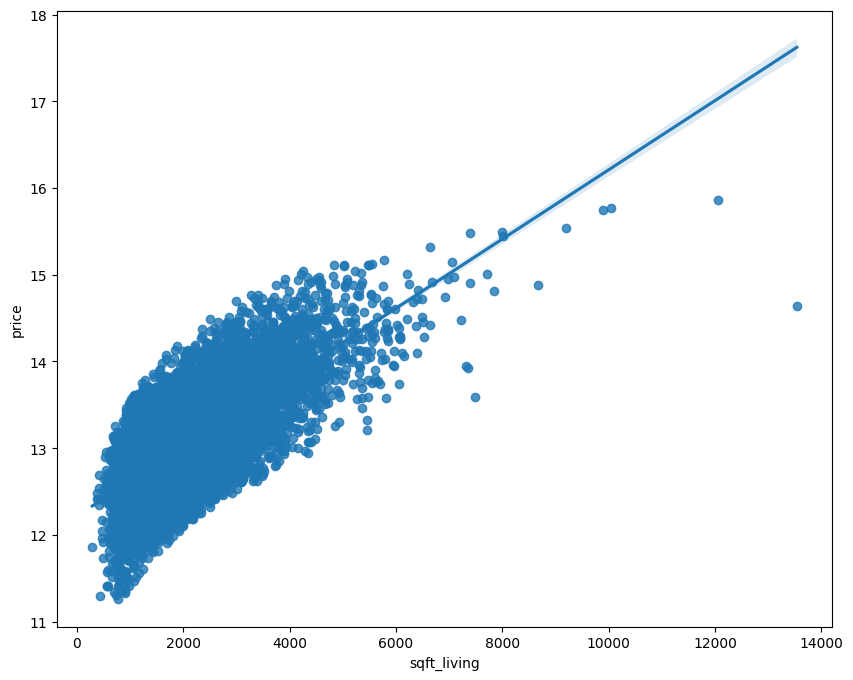

In [12]:
data = pd.concat([df_train['sqft_living'], df_train['price']], axis=1)
f, ax = plt.subplots(figsize=(10,8))
sns.regplot(x='sqft_living', y='price', data=data, ax=ax)

<Axes: xlabel='sqft_living15', ylabel='price'>

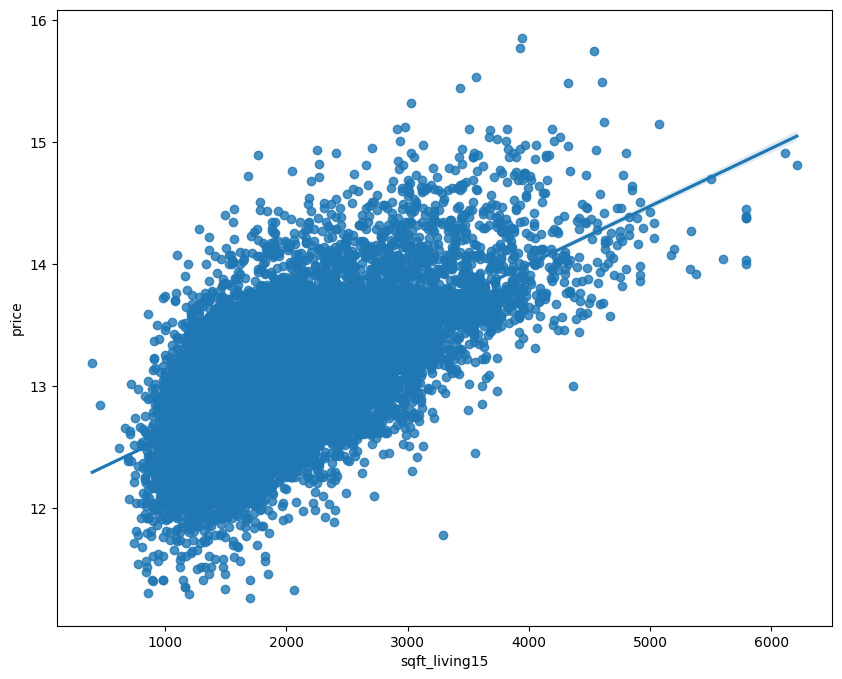

In [13]:
data = pd.concat([df_train['sqft_living15'], df_train['price']], axis=1)
f, ax = plt.subplots(figsize=(10,8))
sns.regplot(x='sqft_living15', y='price', data=data, ax=ax)

<Axes: xlabel='sqft_living15', ylabel='Count'>

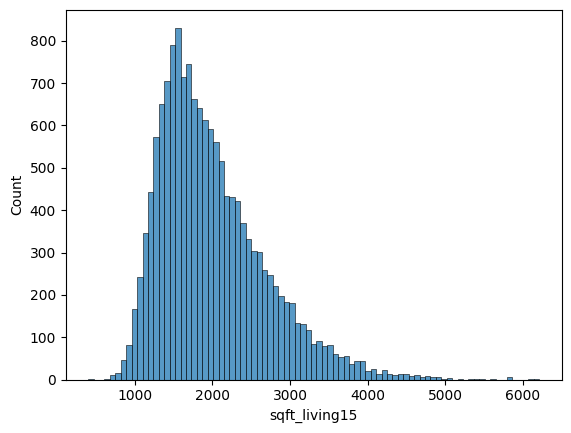

In [14]:
sns.histplot(df_train['sqft_living15'])

<Axes: xlabel='sqft_above', ylabel='price'>

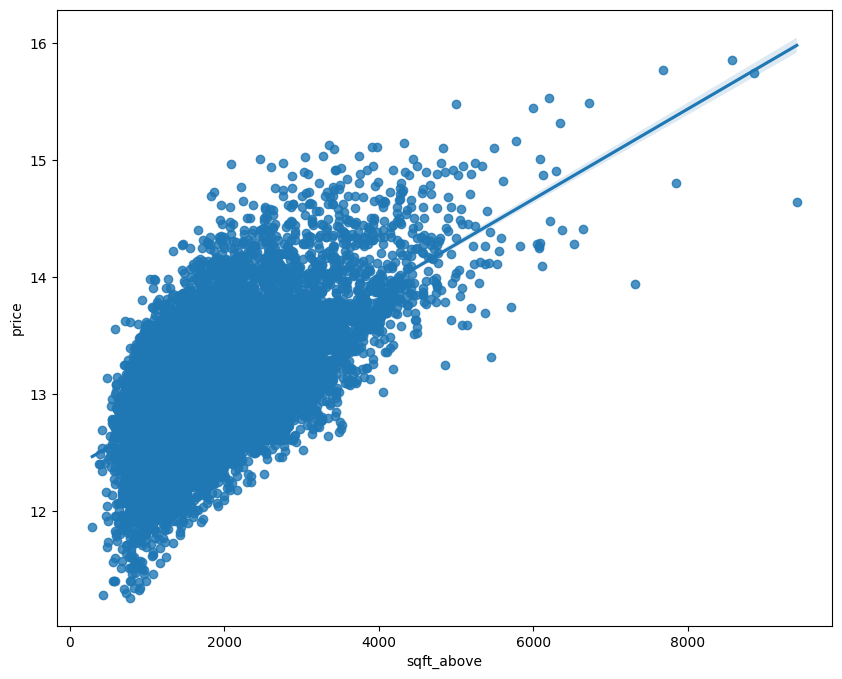

In [15]:
data = pd.concat([df_train['sqft_above'], df_train['price']], axis=1)
f, ax = plt.subplots(figsize=(10,8))
sns.regplot(x='sqft_above', y='price', data=data)

<Axes: xlabel='bedrooms', ylabel='price'>

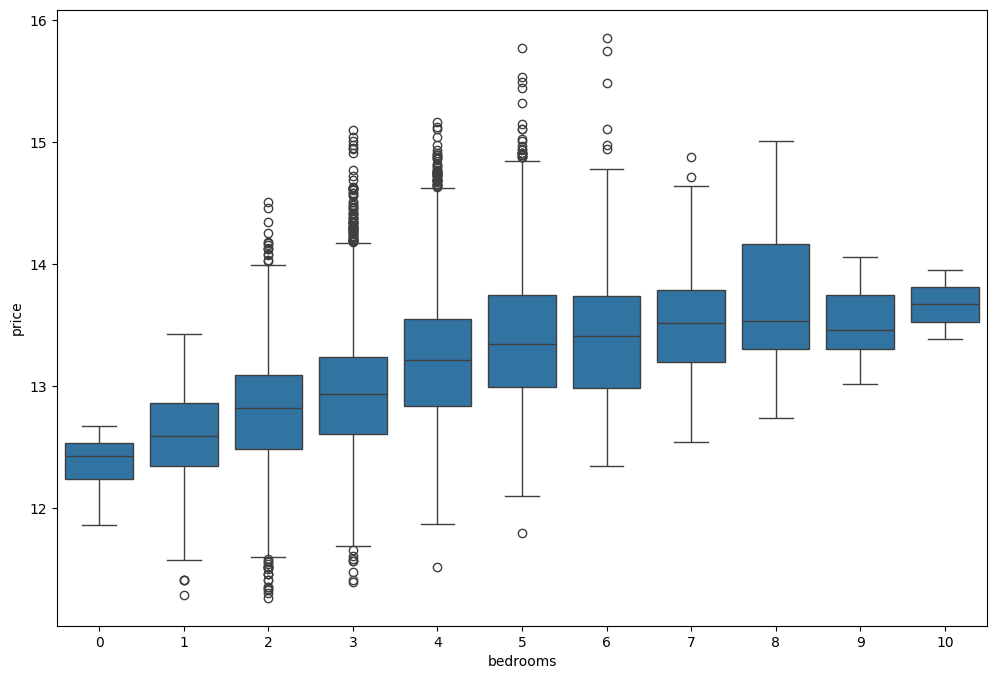

In [16]:
data = pd.concat([df_train['bedrooms'], df_train['price']], axis=1)
f, ac = plt.subplots(figsize=(12,8))
sns.boxplot(x='bedrooms', y='price', data=data)

<Axes: title={'center': 'Test set'}, xlabel='bedrooms', ylabel='count'>

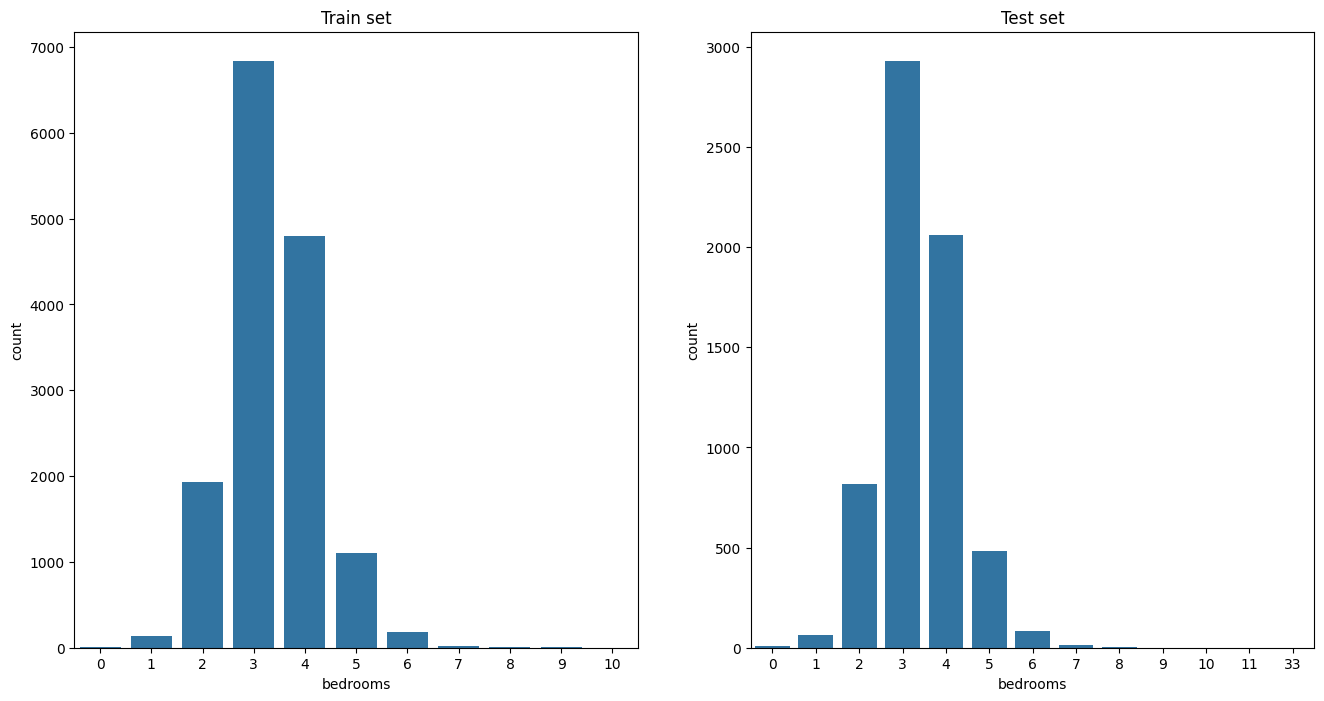

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
ax[0].set(title='Train set')
sns.countplot(x='bedrooms', data=df_train, ax=ax[0])

ax[1].set(title='Test set')
sns.countplot(x='bedrooms', data=df_test, ax=ax[1])

<Axes: xlabel='bathrooms', ylabel='price'>

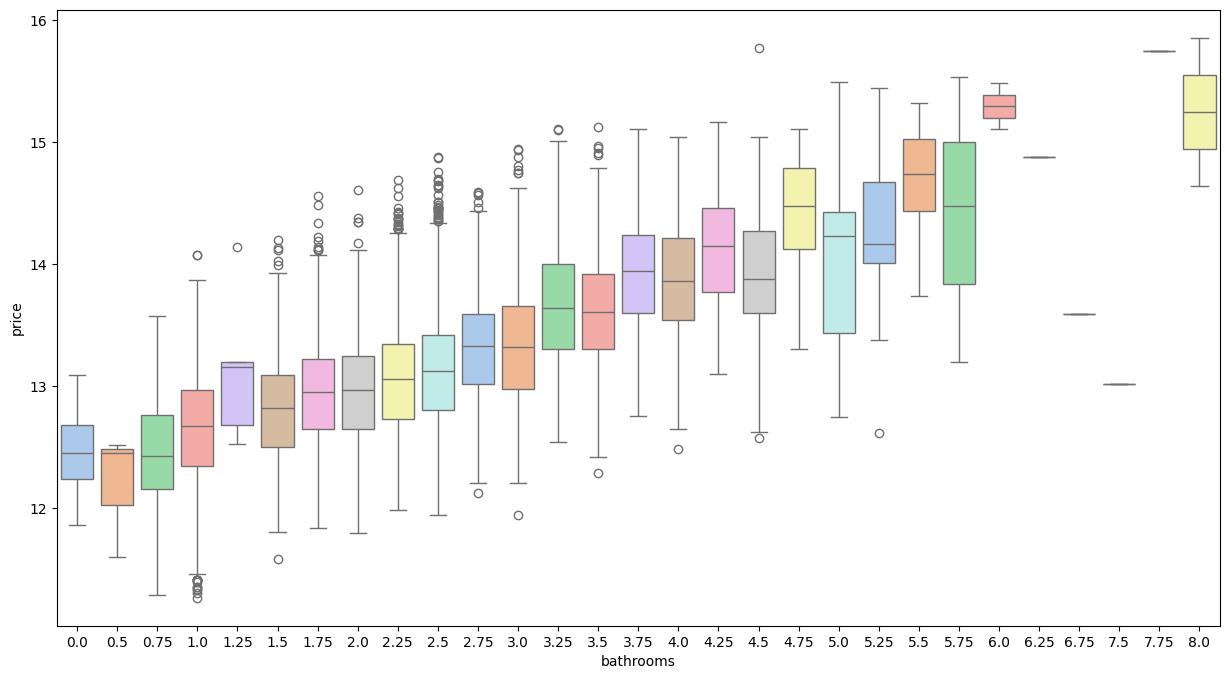

In [18]:
data = pd.concat([df_train['bathrooms'], df_train['price']], axis=1)
f, ac = plt.subplots(figsize=(15,8))
sns.boxplot(x='bathrooms', y='price', data=data, palette=sns.color_palette('pastel'))

<Axes: title={'center': 'Test set'}, xlabel='bathrooms', ylabel='count'>

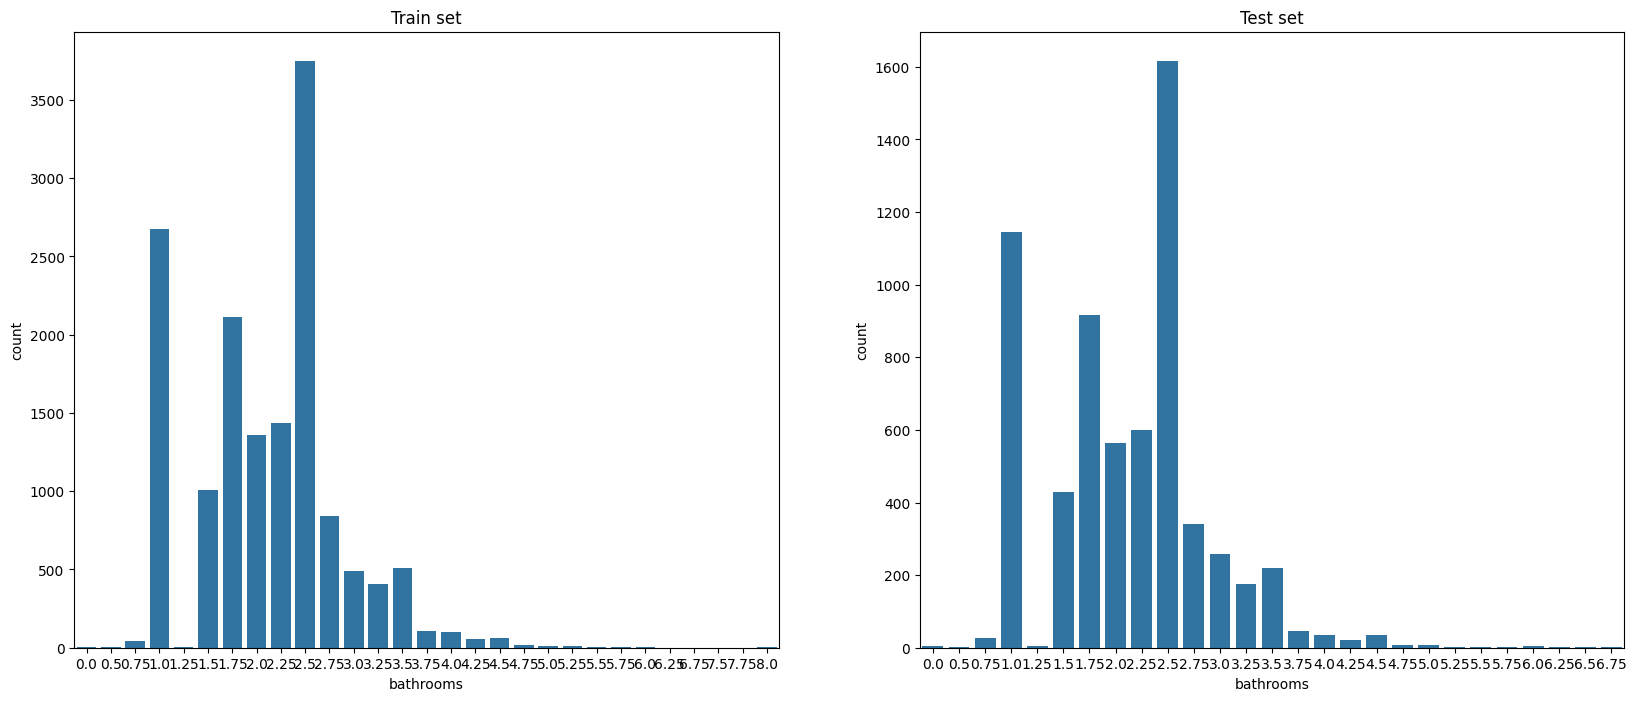

In [19]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,8))
ax[0].set(title='Train set')
sns.countplot(x='bathrooms', data=df_train, ax=ax[0])

ax[1].set(title='Test set')
sns.countplot(x='bathrooms', data=df_test, ax=ax[1])

## 이상치 제거 


<Axes: xlabel='grade', ylabel='price'>

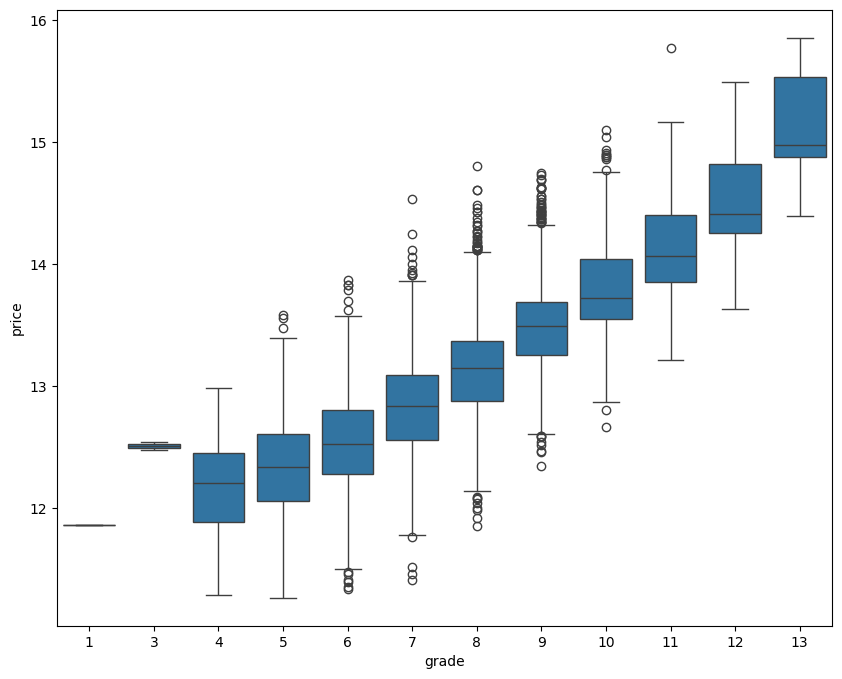

In [20]:
data = pd.concat([df_train['price'], df_train['grade']], axis=1)
f, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=data, x='grade', y='price', ax=ax)

In [21]:
df_train.loc[(df_train['price']>14.5) & (df_train['grade']==7)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12346,12346,20150115T000000,14.533351,4,3.25,3580,19989,1.5,1,4,...,7,3480,100,1915,1965,98125,47.7087,-122.276,2410,6389


In [22]:
df_train.loc[(df_train['price']>14.7) & (df_train['grade']==8)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7173,7173,20140813T000000,14.808763,5,4.0,4230,27295,2.0,1,4,...,8,3230,1000,1949,1985,98033,47.6803,-122.214,2660,27295


In [23]:
df_train.loc[(df_train['price']>15.5) & (df_train['grade']==11)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2775,2775,20140611T000000,15.77031,5,4.5,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.65,-122.214,3930,25449


In [24]:
df_train = df_train.loc[df_train['id'] != 2775]
df_train = df_train.loc[df_train['id'] != 7173]
df_train = df_train.loc[df_train['id'] != 12346]



## 정규화
baseline을 활용해 편향된 데이터들을 정규화 해주겠습니다

In [25]:
skew_columns = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']
skew_columns2 = ['sqft_living15', 'sqft_lot15'] # 1/3 제곱시켜 정규분포에 가깝게!

for c in skew_columns:
    df_train[c] = np.log1p(df_train[c].values)
    df_test[c] = np.log1p(df_test[c].values)
    
for c in skew_columns2:
    df_train[c] = np.power(df_train[c].values, 1/3)
    df_test[c] = np.power(df_test[c].values, 1/3)

## 변수 수정


In [26]:
for df in [df_train, df_test]:
    df['date'] = df['date'].apply(lambda x: x[0:8])
    df['yr_renovated'] = df['yr_renovated'].apply(lambda x: np.nan if x == 0 else x)
    df['yr_renovated'] = df['yr_renovated'].fillna(df['yr_built'])

## 변수 생성

In [27]:
df_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013,12.309987,3,1.00,7.074117,8.639588,1.0,0,0,...,7,7.074117,0.0,1955,1955.0,98178,47.5112,-122.257,11.024738,17.810775
1,1,20150225,12.100718,2,1.00,6.647688,9.210440,1.0,0,0,...,6,6.647688,0.0,1933,1933.0,98028,47.7379,-122.233,13.959064,20.051534
2,2,20150218,13.142168,3,2.00,7.427144,8.997271,1.0,0,0,...,8,7.427144,0.0,1987,1987.0,98074,47.6168,-122.045,12.164404,19.576948
3,3,20140627,12.458779,3,2.25,7.447751,8.827615,2.0,0,0,...,7,7.447751,0.0,1995,1995.0,98003,47.3097,-122.327,13.080370,18.962994
4,4,20150115,12.583999,3,1.50,6.966967,9.181118,1.0,0,0,...,7,6.966967,0.0,1963,1963.0,98198,47.4095,-122.315,11.816658,21.334771


In [28]:
for df in [df_train, df_test]:
    df['total_rooms'] = df['bedrooms'] + df['bathrooms']
    # 거실의 비율
    df['sqft_ratio'] = df['sqft_living'] / df['sqft_lot']
    # 총 면적
    df['sqft_total_size'] = df['sqft_living'] + df['sqft_lot'] + df['sqft_above'] + df['sqft_basement']
    # 면적 대비 거실 비율
#     df['sqft_ratio_1'] = df['sqft_living'] / df['sqft_total_size']
    df['sqft_total15'] = df['sqft_living15'] + df['sqft_lot15']
#     df['sqft_ratio15'] = df['sqft_living15'] / df['sqft_total15'] 

    df['is_renovated'] = df['yr_renovated'] - df['yr_built']
    df['is_renovated'] = df['is_renovated'].apply(lambda x: 0 if x==0 else 1)
    df['date'] = df['date'].astype('int')

In [29]:
df_train['per_price'] = df_train['price'] / df_train['sqft_total_size']


In [30]:
df_train

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,total_rooms,sqft_ratio,sqft_total_size,sqft_total15,is_renovated,per_price
0,0,20141013,12.309987,3,1.00,7.074117,8.639588,1.0,0,0,...,47.5112,-122.257,11.024738,17.810775,4.00,0.818803,22.787821,28.835513,0,0.540200
1,1,20150225,12.100718,2,1.00,6.647688,9.210440,1.0,0,0,...,47.7379,-122.233,13.959064,20.051534,3.00,0.721756,22.505817,34.010598,0,0.537671
2,2,20150218,13.142168,3,2.00,7.427144,8.997271,1.0,0,0,...,47.6168,-122.045,12.164404,19.576948,5.00,0.825489,23.851559,31.741352,0,0.550998
3,3,20140627,12.458779,3,2.25,7.447751,8.827615,2.0,0,0,...,47.3097,-122.327,13.080370,18.962994,5.25,0.843688,23.723117,32.043363,0,0.525175
4,4,20150115,12.583999,3,1.50,6.966967,9.181118,1.0,0,0,...,47.4095,-122.315,11.816658,21.334771,4.50,0.758837,23.115052,33.151428,0,0.544407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,15030,20141014,13.322338,4,2.50,7.832411,8.703507,2.0,0,0,...,47.5137,-122.167,13.608184,18.194395,6.50,0.899914,24.368329,31.802579,0,0.546707
15031,15031,20150326,13.822984,4,3.50,8.163656,8.881975,2.0,0,0,...,47.5537,-122.398,12.703341,18.370906,7.50,0.919126,31.723826,31.074246,0,0.435729
15032,15032,20140521,12.793862,3,2.50,7.333676,7.031741,3.0,0,0,...,47.6993,-122.346,11.522954,11.469991,5.50,1.042939,21.699094,22.992945,0,0.589604
15033,15033,20150223,12.899222,4,2.50,7.745436,8.668024,2.0,0,0,...,47.5107,-122.362,12.231612,19.309788,6.50,0.893564,24.158895,31.541400,0,0.533933


In [31]:
zipcode_price = df_train.groupby(['zipcode'])['per_price'].agg({'mean', 'var'}).reset_index()
zipcode_price

,zipcode,mean,var
0,98001,0.491304,0.002462
1,98002,0.507602,0.001960
2,98003,0.484890,0.002909
3,98004,0.507590,0.003956
4,98005,0.477376,0.003489
...,...,...,...
65,98177,0.485149,0.003515
66,98178,0.476389,0.003626
67,98188,0.491031,0.002797
68,98198,0.489639,0.003175


In [32]:
df_train = pd.merge(df_train, zipcode_price, how='left', on='zipcode')
df_test = pd.merge(df_test, zipcode_price, how='left', on='zipcode')
df_train

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,total_rooms,sqft_ratio,sqft_total_size,sqft_total15,is_renovated,per_price,mean,var
0,0,20141013,12.309987,3,1.00,7.074117,8.639588,1.0,0,0,...,11.024738,17.810775,4.00,0.818803,22.787821,28.835513,0,0.540200,0.476389,0.003626
1,1,20150225,12.100718,2,1.00,6.647688,9.210440,1.0,0,0,...,13.959064,20.051534,3.00,0.721756,22.505817,34.010598,0,0.537671,0.489564,0.003682
2,2,20150218,13.142168,3,2.00,7.427144,8.997271,1.0,0,0,...,12.164404,19.576948,5.00,0.825489,23.851559,31.741352,0,0.550998,0.510655,0.002576
3,3,20140627,12.458779,3,2.25,7.447751,8.827615,2.0,0,0,...,13.080370,18.962994,5.25,0.843688,23.723117,32.043363,0,0.525175,0.484890,0.002909
4,4,20150115,12.583999,3,1.50,6.966967,9.181118,1.0,0,0,...,11.816658,21.334771,4.50,0.758837,23.115052,33.151428,0,0.544407,0.489639,0.003175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15027,15030,20141014,13.322338,4,2.50,7.832411,8.703507,2.0,0,0,...,13.608184,18.194395,6.50,0.899914,24.368329,31.802579,0,0.546707,0.507441,0.002771
15028,15031,20150326,13.822984,4,3.50,8.163656,8.881975,2.0,0,0,...,12.703341,18.370906,7.50,0.919126,31.723826,31.074246,0,0.435729,0.498295,0.003831
15029,15032,20140521,12.793862,3,2.50,7.333676,7.031741,3.0,0,0,...,11.522954,11.469991,5.50,1.042939,21.699094,22.992945,0,0.589604,0.540240,0.004502
15030,15033,20150223,12.899222,4,2.50,7.745436,8.668024,2.0,0,0,...,12.231612,19.309788,6.50,0.893564,24.158895,31.541400,0,0.533933,0.498055,0.003207


In [33]:
del df_train['per_price']

4. 모델링

In [34]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

In [35]:
y_reg = df_train['price']
del df_train['price']
del df_train['id']
test_id = df_test['id']
del df_test['id']

In [36]:
kfolds = KFold(n_splits=10, random_state=2019, shuffle=True)

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(estimator=model, X=df_train, y=y_reg, scoring='neg_mean_squared_error', cv=kfolds))
    return rmse

In [37]:
train_columns = [c for c in df_train.columns if c not in ['id']]

In [38]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

# 파라미터 그리드 정의
param_grid = {
"num_leaves":[20,25,30],
"learning_rate" : [0.1],
'n_estimators': [350,400],
'max_depth': [8,12],
"boosting_type":['gbdt'],
"feature_fraction":[0.5],
}


# 모델 정의
model = LGBMRegressor(objective='regression', max_depth=-1, random_state=2019, n_estimators=10000, n_jobs=-1)

# 그리드 서치 객체 생성
grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# 훈련 데이터 준비
X_train = df_train[train_columns]
y_train = y_reg

# 그리드 서치 실행
grid.fit(X_train, y_train)

# 결과 확인
print(f'Best parameters: {grid.best_params_}')
print(f'Best score (RMSE): {np.sqrt(-grid.best_score_)}')

# 최적의 파라미터를 사용한 모델 훈련
best_params = grid.best_params_
model.set_params(**best_params)
model.fit(X_train, y_train)

# 예측 및 성능 평가 (예시)
predictions = model.predict(df_test[train_columns])
# RMSE 계산


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001559 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3583
[LightGBM] [Info] Number of data points in the train set: 15032, number of used features: 26
[LightGBM] [Info] Start training from score 13.047725
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best parameters: {'boosting_type': 'gbdt', 'feature_fraction': 0.5, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 400, 'num_leaves': 20}
Best score (RMSE): 0.16005147161547362
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will

In [39]:
test_preds = np.expm1(predictions)

In [40]:
submission0 = pd.DataFrame({'id' : test_id, 'price' : test_preds})
submission0.to_csv('lgbm.csv', index=False)

In [41]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

param = {
    'num_leaves' : 31,
    'min_data_in_leaf' : 10,
    'objective' : 'regression',
    'max_depth' : -1,
    'learning_rate' : 0.008,
    'min_child_samples' : 12,
    'boosting' : 'gbdt',
    'feature_fraction' : 0.3,
    'bagging_freq' : 1,
    'bagging_fraction' : 0.6,
    'bagging_seed' : 11,
    'metric' : 'rmse',
    'lambda_l2' : 8,
    'verbosity' : -1,
    'nthread' : -1,
    'random_state' : 2019
}

# prepare fit model with cross-validation
folds = KFold(n_splits=5, shuffle=True, random_state=2019)
oof1 = np.zeros(len(df_train))
predictions = np.zeros(len(df_test))
feature_importance_df = pd.DataFrame()

# run model
for fold_, (trn_index, val_index) in enumerate(folds.split(df_train)):
    trn_data = lgb.Dataset(df_train.iloc[trn_index][train_columns], label=y_reg.iloc[trn_index])
    val_data = lgb.Dataset(df_train.iloc[val_index][train_columns], label=y_reg.iloc[val_index])
    
    num_round = 10000
    clf = lgb.train(params=param, train_set=trn_data, num_boost_round=num_round, valid_sets=[trn_data, val_data])
    oof1[val_index] = clf.predict(df_train.iloc[val_index][train_columns], num_iterations=clf.best_iteration) # 나중에 스태킹을 위한 train 데이터도 된다.
    # feature importance
    fold_importance_df = pd.DataFrame()
    fold_importance_df['Feature'] = train_columns
    fold_importance_df['importance'] = clf.feature_importance()
    
    fold_importance_df['fold'] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    # predictions
    predictions += clf.predict(df_test[train_columns], num_iterations=clf.best_iteration) / folds.n_splits # 나중에 스태킹을 위한 test 데이터도 된다.
    
cv = np.sqrt(mean_squared_error(oof1, y_reg))
print(cv)

0.15812860356441152


In [42]:
test_lgb_preds = np.expm1(predictions)



In [43]:
predictions_grid = grid.best_estimator_.predict(df_test[train_columns])


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5


In [44]:
submission0 = pd.DataFrame({'id' : test_id, 'price' : test_lgb_preds})
submission0.to_csv('lgb.csv', index=False)